### Reference: <br>
Data science basics<br>
Doing Data Science<br>
By: Cathy O'Neil; Rachel Schutt<br>
Publisher: O'Reilly Media, Inc.<br>
Pub. Date: October 24, 2013<br>
Print ISBN-13: 978-1-4493-5865-5<br>
Chapter 3 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871

### LInear Regression

It is used when you want to express the mathematical relationship between two variables. When you use it, you are making the assumption that there is a linear relationship between an outcome variable (sometimes also called the response variable, dependent variable, or label) and a predictor (sometimes also called an independent variable, explanatory variable, or feature). Regression can be described as a statistical model as well as a machine learning algorithm.

Motivating Example: Suppose you run a social networking site that charges a monthly subscription fee of $25. Each month you collect the following data:

x: number of users (explanatory/independent variable)

y: total revenues (dependent variable)

$S = \{ (x, y) = (1, 25), (10, 250), (100, 2500), (200, 5000) \}$

Relationship between x and y ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

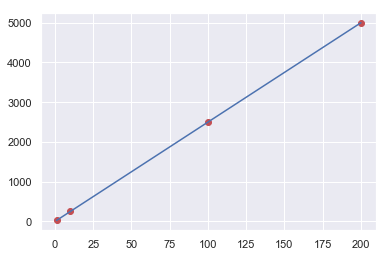

In [2]:
x = [1, 10, 100, 200]
y = [25, 250, 2500, 5000]
plt.plot(x, y, 'ro')
plt.plot(x, y)

We do not have to plot to see the relationship between the data as $y = 25x$

Example: We randomly sample the following data from a social networking site:

x: number of friends

y: time spent in seconds on the site
<br>
<font size="3">
$S = \{ (x, y) = (7,276), (3,43), (4,82), (6,136), (10,417), (9,269), (3,60), (6,200) \}$
</font>
<br><br>
The relationship between x and y is not so obvious. Let us plot it.

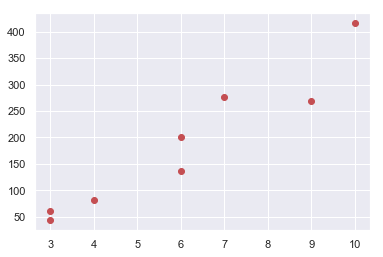

In [3]:
x = [7,3,4,6,10,9,3,6]
y = [276,43,82,136,417,269,60,200]
plt.plot(x, y, 'ro')

It looks like there is some kind of linear relationship - the more new friends you have, the more time you might spend on the site. In conatrast to the earlier example, there is no deterministics relationship - for the same value of $x$ there are multiple values of $y$ ($x = 3$ and $x =6$). 

How can we figure out the relationship here?

I can draw multiple lines that seems to model the data!

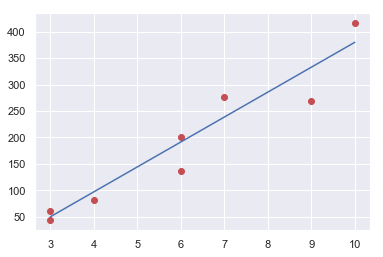

In [4]:
x = [7,3,4,6,10,9,3,6]
y = [276,43,82,136,417,269,60,200]
plt.plot(x, y, 'ro')
plt.plot([3, 10], [50, 380])

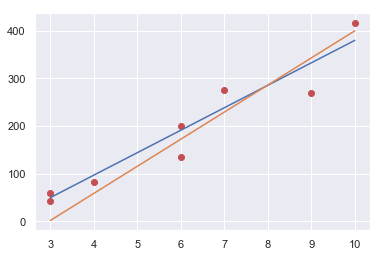

In [5]:
x = [7,3,4,6,10,9,3,6]
y = [276,43,82,136,417,269,60,200]
plt.plot(x, y, 'ro')
plt.plot([3, 10], [50, 380])
plt.plot([3, 10], [2, 400])

So how do we pick which one?

Because we are assuming a linear relationship, let us assume we can express this in a general form:
<br><br>
<font size="3">$\hat{y} = \beta_0 + \beta_1 x $</font>

<br>
Now based on the observed data:

<font size="3">
$S = \{ (x, y) = (7,276), (3,43), (4,82), (6,136), (10,417), (9,269), (3,60), (6,200) \}$
</font>
<br><br>

We can express our model as:

$$ \mathbf{\hat{y}} =
\begin{bmatrix}
    1       & 7 \\    
    1       & 3 \\ 
    1       & 4 \\    
    1       & 6 \\ 
    1       & 10 \\    
    1       & 9 \\ 
    1       & 3 \\    
    1       & 6  
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\  
    \beta_1
\end{bmatrix}$$
<br>
where we would like $\mathbf{\hat{y}}$ to be close to: 
$$
\mathbf{y} =
\begin{bmatrix}
    276  \\    
    43 \\ 
    82 \\    
    136 \\ 
    417 \\    
    269 \\ 
    60 \\    
    200  
\end{bmatrix}
$$
<br><br>
In matrix notation:
<br>
<font size="4">
$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\beta}$$
</font>

Here, $\mathbf{X}$ is referred as a design matrix and in general it is of size $m \times n$, where $m$ is the number of observations and $n$ is the number of features. The $\mathbf{\beta}$ is a vector of size $n$. The $\mathbf{\hat{y}}$ gives estimated value of $\mathbf{y}$. 

### Fitting the model
So, how do we calculate  $\mathbf{\beta}$. The intuition behind linear regression is that you want to find the line (in this example) that minimizes the distance between all the points and the line. More specifically, linear regression seeks to find the line that minimizes the sum of the squares of the vertical distances between the approximated or predicted $\hat{y_i}$s and the observed $y_i$s. This method is called least squares estimation and it minimizes the prediction error.

The prediction error $R(\beta_0, \beta_1)$ is given by:

$R = [276 -(\beta_0 + 7\beta_1)]^2 +  [43 -(\beta_0 + 3\beta_1)]^2 + [82 -(\beta_0 + 4\beta_1)]^2 + \ldots $ 

Calculate partial derivatives with respect to $\beta_0$ and $\beta_1$ and set them to zero.

$\dfrac{\partial R}{\partial \beta_0} = 0$, and $\dfrac{\partial R}{\partial \beta_1} = 0$

This  result in two equations with two unknowns ($\beta_0$ and $\beta_1$). 

NOTE: In general this results in a <font color='red'>linear</font> system of equations with unknow $\beta$'s. The "Linear Model" names come from here.

Exercise (Take Home): Solve these equations for $\beta_0$ and $\beta_1$.


In [10]:
∂𝑅/∂𝛽0=42𝛽21+12𝛽1+1=0
∂𝑅/∂𝛽1=𝛽20+12𝛽0+42=0

SyntaxError: invalid character in identifier (<ipython-input-10-fd5480211000>, line 1)

The prediction error in matrix notation can be expressed as:

$R =  (\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta}) $

We can simplify this

$R =  (\mathbf{y}^T - (\mathbf{X}\mathbf{\beta})^T)(\mathbf{y} - \mathbf{X}\mathbf{\beta}) $

$~~ =  (\mathbf{y}^T - \mathbf{\beta}^T\mathbf{X}^T)(\mathbf{y} - \mathbf{X}\mathbf{\beta}) $

$~~ =  \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X}\mathbf{\beta} - \mathbf{\beta}^T\mathbf{X}^T \mathbf{y} + \mathbf{\beta}^T\mathbf{X}^T \mathbf{X}\mathbf{\beta}
$

Note that the transpose of a scalar is a scalar. Hence we write:

$\mathbf{y}^T \mathbf{X}\mathbf{\beta} = (\mathbf{y}^T \mathbf{X}\mathbf{\beta})^T$

This can be simplifed to:

$\mathbf{y}^T \mathbf{x}\mathbf{\beta} = ( \mathbf{X}\mathbf{\beta})^T \mathbf{y} = \mathbf{\beta}^T\mathbf{X}^T \mathbf{y}$

We can use this to simplify $R$

$R =  \mathbf{y}^T \mathbf{y}  - 2\mathbf{\beta}^T\mathbf{X}^T \mathbf{y} + \mathbf{\beta}^T\mathbf{X}^T \mathbf{X}\mathbf{\beta}
$
<br><br>


$\dfrac{\partial R}{\partial \mathbf{\beta}} =- 2\mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\mathbf{\beta} = 0
$

$(\mathbf{X}^T \mathbf{X}) \mathbf{\beta} =  \mathbf{X}^T \mathbf{y}$

$(\mathbf{X}^T \mathbf{X})^{-1}(\mathbf{X}^T \mathbf{X}) \mathbf{\beta} =  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$

$\mathbf{\beta} =  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$

In [11]:
# solve using matrix notation
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])

In [12]:
Xt = np.vstack((np.ones(8), xt))

In [13]:
Xt

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 7.,  3.,  4.,  6., 10.,  9.,  3.,  6.]])

In [14]:
X = Xt.T
y = yt.T
print (np.shape(X), np.shape(y))
print(X)

(8, 2) (8,)
[[ 1.  7.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1. 10.]
 [ 1.  9.]
 [ 1.  3.]
 [ 1.  6.]]


In [15]:
XtX = np.dot(X.T, X)
print(XtX)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X.T, y)

[[  8.  48.]
 [ 48. 336.]]


In [16]:
b = np.dot(XtX_inv, Xty)
print(b)

[-99.375       47.45833333]


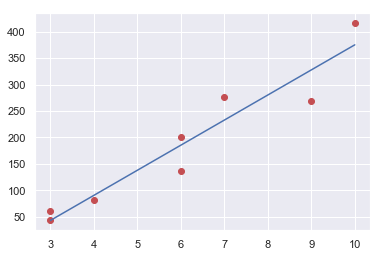

In [17]:
x = [7,3,4,6,10,9,3,6]
y = [276,43,82,136,417,269,60,200]
plt.plot(x, y, 'ro')
# for plotting regression line use two points
y3 =  b[0] + b[1]*3
y10 = b[0] + b[1]*10
plt.plot([3, 10], [y3, y10]) 

We can solve for $\mathbf{\beta}$ without computing the inverse, but by solving the system.

$(\mathbf{X}^T \mathbf{X}) \mathbf{\beta} =  \mathbf{X}^T \mathbf{y}$

In [13]:
bn = np.linalg.solve(XtX, Xty)
bn

array([-99.375     ,  47.45833333])

Exercise: Consider the following $(x,y)$ dataset:
        
<br>
<font size="3">
$S = \{ (x, y) = (1,6), (2,5), (3,7), (4,10)\}$
</font>
<br><br>
As shown above using numpy estimate the linear regression parameters and plot the regression line along with the scatter plot.

In [18]:
xt = np.array([1,2,3,4])
yt=np.array([6,5,7,10])
Xt = np.vstack((np.ones(4), xt))
Xt

array([[1., 1., 1., 1.],
       [1., 2., 3., 4.]])

In [19]:
X = Xt.T
y = yt.T
print (np.shape(X), np.shape(y))
print(X)
XtX = np.dot(X.T, X)
print(XtX)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X.T, y)

(4, 2) (4,)
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]
[[ 4. 10.]
 [10. 30.]]


In [20]:
b = np.dot(XtX_inv, Xty)
print(b)

[3.5 1.4]


In linear regression, we are not restricted to using a line as the model. We can use a polynomial to model it, for example:

$y = \beta_0 + \beta_1 x + \beta_2 x^2$

This model is still linear with respect to parameters, so we can perform the same computation as before for estimating the parameters. 


In [26]:
# quadratic model 
xt = np.array([7,3,4,6,10,9,3,6])
xt2 = xt*xt
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])

In [27]:
print(xt2)

[ 49   9  16  36 100  81   9  36]


In [28]:
m = len(xt)
X = np.array([np.ones(m), xt, xt2]).T
y = yt.T

In [29]:
X

array([[  1.,   7.,  49.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       [  1.,   9.,  81.],
       [  1.,   3.,   9.],
       [  1.,   6.,  36.]])

[-50.625       29.22222222   1.44444444]


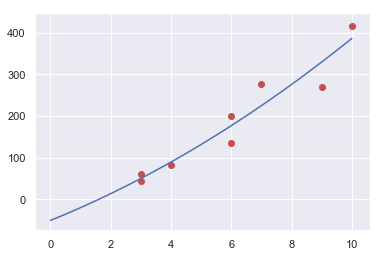

In [31]:
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
betaHat = np.linalg.solve(XtX, Xty)
print(betaHat)
plt.figure(1)
xx = np.linspace(0, 10, 100)
xx2 = xx * xx
yy = np.array(betaHat[0] + betaHat[1] * xx + betaHat[2] * xx2)
plt.plot(xx, yy.T, color='b')
plt.scatter(xt, yt, color='r')
plt.show()

#### Linear Regression with Multiple Variables (Features)

A linear regression with three variables (features) can be expressed as
<br><br>
<font size="3">
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_3 + \beta_3 x_3  $
</font>

Rest of the math dealing with matrix formulation and for estimating parameters remains the same. 


### Machine Learning and Gradient Descent 
When there are many features and many observations, the matrix in the linear solver becomes big and its computation complexity is high. An alternative method based on gradient descent can be much faster in such cases. Gradient descent and its variants stochastic gradient descent are very popular in machine learning community. We will be using terminology used by that community, so  you may see me using different names for the same stuff.

Use  training data to learn parameters/weights of a model

Use the model with learned parameters/weights to make prediction

#### Training Data
Training data is the same as the set of observations in our earlier example for linear regression.

$S = \{ (x, y) = (7,276), (3,43), (4,82), (6,136), (10,417), (9,269), (3,60), (6,200) \}$

Our training set consists of $m=8$ samples, where $i$th training sample is $(x^{(i)}, y^{(i)})$, $i=1,m$. In our example training data $x^{(1)} = 7$ and $y^{(1)} = 276$. Note that in the case of multivariable linear regression, $x^{(i)}$ has various components - as many as the number of features. The $j$th feature is represented by $x_j^{(i)}$

Using these notations, we can express our objectives as to find $\mathbf{\beta}$ that gives us $\mathbf{\hat{y}}$ which is close to $\mathbf{y}$, where 

$$\mathbf{\hat{y}} =
\begin{bmatrix}
    x_0^{(1)}       & x_1^{(1)}\\    
    x_0^{(2)}       & x_1^{(2)}\\ 
    x_0^{(3)}       & x_1^{(3)}\\    
    x_0^{(4)}       & x_1^{(4)}\\ 
    x_0^{(5)}       & x_1^{(5)}\\    
    x_0^{(6)}       & x_1^{(6)}\\ 
    x_0^{(7)}       & x_1^{(7)}\\    
    x_0^{(8)}       & x_1^{(8)} 
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\  
    \beta_1
\end{bmatrix}$$

and 

$$
\begin{bmatrix}
    x_0^{(1)}       & x_1^{(1)}\\    
    x_0^{(2)}       & x_1^{(2)}\\ 
    x_0^{(3)}       & x_1^{(3)}\\    
    x_0^{(4)}       & x_1^{(4)}\\ 
    x_0^{(5)}       & x_1^{(5)}\\    
    x_0^{(6)}       & x_1^{(6)}\\ 
    x_0^{(7)}       & x_1^{(7)}\\    
    x_0^{(8)}       & x_1^{(8)} 
\end{bmatrix}
=
\begin{bmatrix}
    1       & 7 \\    
    1       & 3 \\ 
    1       & 4 \\    
    1       & 6 \\ 
    1       & 10 \\    
    1       & 9 \\ 
    1       & 3 \\    
    1       & 6  
\end{bmatrix}
$$

In machine learning the function that we want to learn is referred as hypotheses $h$, and in our case:

$h_{\beta}(x) = h(x) = \beta_0 x_0 + \beta_1 x_1$ (this is also sometime written as $h_{\beta}(x) = \mathbf{\beta}^T \mathbf{x}$, where $\mathbf{x}$ is a feature vector)

For a given set of parameters $\beta_0$, $\beta_1$, and the $i$th training data, the value of the function is given by:

$h(x^{(i)}) = \beta_0 x_0^{(i)} + \beta_1 x_1^{(i)}$

Now given the training set, how do we learn the parameters?

#### Cost Function
We define a cost function $J(\beta)$ that measures how close the $h(x^{(i)})$'s are to  the corresponding $y^{(i)}$'s for a  given set of parameters $\beta$. It is very similar to error expression defined earlier. 

$J(\beta) = \dfrac{1}{2}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2$

Now we are ready to talk about gradient descent.

#### Gradient Descent

Gradient descent algorithm starts with some initial $\beta_j$'s, and repeatedly update them:

$\beta_j := \beta_j - \alpha\dfrac{\partial}{\partial \beta_j} J(\beta)$

In our example, we are updating two parameters $\beta_0$ and $\beta_1$ at each time step. The $\alpha$ is called learning rate. This algorithm basically takes a step in the direction of steepest decrease of $J$ for updating $\beta_j$'s.

We need the partial derivative, that is the direction of steepest decrease.

$\dfrac{\partial}{\partial \beta_j} J(\beta) = \sum_{i=1}^m (h(x^{(i)})-y^{(i)})x_{j}^{(i)}$

This gives

$\beta_j := \beta_j - \alpha\sum_{i=1}^m (h(x^{(i)})-y^{(i)})x_{j}^{(i)}$


Exercise: Consider our example training set $S = \{ (x, y) = (7,276), (3,43), (4,82), (6,136), (10,417), (9,269), (3,60), (6,200) \}$. Starting with initial value of $\beta_0 = 0.0$, and $\beta_1=0.0$, update the parameters for one time step. Use $\alpha = 0.005$.

In [34]:
#partial solution

def slope(b0, b1, X,y):
    sumv0 = 0.0
    sumv1 = 0.0
    for i in range(8):
        sumv0 = sumv0 + (b0*X[i,0]+b1*X[i,1]-y[i])*X[i,0]
        sumv1 =sumv1 + (b0*X[i,0]+b1*X[i,1]-y[i])*X[i,1]
       
    return sumv0, sumv1

xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
m = len(xt)
X = np.array([np.ones(m), xt]).T
alpha = 0.005
b0 = 0.0
b1 = 0.0
sum0, sum1 = slope(b0, b1, X,y)
b0 = b0 - alpha*sum0
b1 = b1 - alpha*sum1

print (b0, b1)    


7.415 55.88


In [36]:
for i in range (1500):
    sum0, sum1 = slope(b0, b1, X,y)
    b0 = b0 - alpha*sum0
    b1 = b1 - alpha*sum1
print (b0, b1)

-99.35226577226072 47.455074725212825


Exercise: Iterate over 1500 time steps and print out the final parameter values. Use the parameter values to compute y estimates.

### Stochastic Gradient Algorithm

In gradient descent at each time step we update parameter values using all the training data. If at each time step we use only one traning sample to update the parameter values, the algorithm becomes stochastic gradient algorithm. For very large training data and complex models (for example, neural networks), the stochastic gradient is more efficient. For machine learning community, the stochastic gradient is a preferred algorithm over gradient descent. 

The following expression shows how to update parameter values using a single traning sample $i$.

$\beta_j := \beta_j - \alpha(h(x^{(i)})-y^{(i)})x_{j}^{(i)}$



Starting with initial value of $\beta_0 = 0.0$, and $\beta_1=0.0$, update the parameters for one time step using sample $(7, 276)$. Use $\alpha = 0.005$.

In [3]:
alpha = 0.005
b0 = 0.0
b1 = 0.0
s0 = (b0*1.0 + b1*7.0 - 276)*1.0
s1 = (b0*1.0 + b1*7.0 - 276)*7.0
b0 = b0 - alpha*s0
b1 = b1 - alpha*s1
print (b0, b1, s0, s1)

1.3800000000000001 9.66 -276.0 -1932.0


Exercise: Starting with initial value of $\beta_0 = 0.0$, and $\beta_1=0.0$, update the parameters for 8 time steps using 8 samples one after another. Use $\alpha = 0.005$.

In [5]:
#Partial Solution
import numpy as np
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
m = len(xt)
X = np.array([np.ones(m), xt]).T
y = yt.T
b0 = 0.0
b1 = 0.0
for i in range(8):
    s0 = (b0*X[i,0] + b1*X[i,1] - y[i])*X[i,0]
    s1 = (b0*X[i,0] + b1*X[i,1] - y[i])*X[i,1]
    b0 = b0 - alpha*s0
    b1 = b1 - alpha*s1

print(b0, b1)
    


3.55624748851323 28.59687038458138


Exercise: Starting with initial value of $\beta_0 = 0.0$, and $\beta_1=0.0$, repeat the computation of previous exercise 700 times. Please make sure you intialize $\beta_0 = 0.0$, and $\beta_1=0.0$ only once at the beginning of the iteration.

In [6]:
for k in range(700):
    for i in range(8):
        s0 = (b0*X[i,0] + b1*X[i,1] - y[i])*X[i,0]
        s1 = (b0*X[i,0] + b1*X[i,1] - y[i])*X[i,1]
        b0 = b0 - alpha*s0
        b1 = b1 - alpha*s1
        
print(b0, b1)



-97.51463964224062 46.54710244983365


### Overfitting and Underfitting

[-239.37938623  137.71771203  -17.10783714    0.96713127]


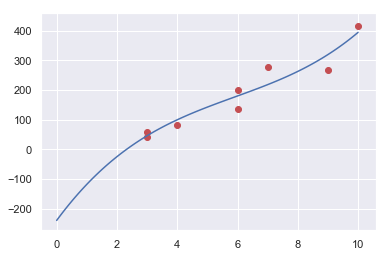

In [10]:
# Higher degree polynomial
xt = np.array([7,3,4,6,10,9,3,6])
xt2 = xt*xt
xt3 = xt*xt*xt
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
m = len(xt)
X = np.array([np.ones(m), xt, xt2, xt3]).T
y = yt.T
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
betaHat = np.linalg.solve(XtX, Xty)
print(betaHat)
plt.figure(1)
xx = np.linspace(0, 10, 100)
xx2 = xx * xx
xx3 = xx * xx * xx
yy = np.array(betaHat[0] + betaHat[1] * xx + betaHat[2] * xx2 + betaHat[3] * xx3)
plt.plot(xx, yy.T, color='b')
plt.scatter(xt, yt, color='r')
plt.show()

[ 1.37330404e+03 -1.05518472e+03  2.90446119e+02 -3.22421856e+01
  1.27865234e+00]


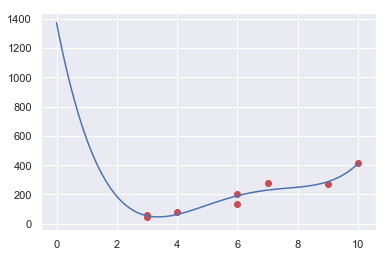

In [11]:
# Higher degree polynomial
xt = np.array([7,3,4,6,10,9,3,6])
xt2 = xt*xt
xt3 = xt*xt*xt
xt4 = xt*xt*xt*xt
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
m = len(xt)
X = np.array([np.ones(m), xt, xt2, xt3, xt4]).T
y = yt.T
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
betaHat = np.linalg.solve(XtX, Xty)
print(betaHat)
plt.figure(1)
xx = np.linspace(0, 10, 100)
xx2 = xx * xx
xx3 = xx * xx * xx
xx4 = xx * xx * xx * xx
yy = np.array(betaHat[0] + betaHat[1] * xx + betaHat[2] * xx2 + betaHat[3] * xx3 + betaHat[4] * xx4)
plt.plot(xx, yy.T, color='b')
plt.scatter(xt, yt, color='r')
plt.show()

In the above plot the algorithm is aggresively trying to fit every data point, and is an example of overfitting. These algorithm typically do not perform well in test/prediction phase. On the other extreme is underfitting (when we used one feature).

### Regularization

L2 regularization (Ridge regression) adds a term to cost function so as to keep parameter value associated with less important feature to be small.

$J(\beta) = \dfrac{1}{2}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2   +   \lambda \sum_{j=1}^n \beta_j^2 $

L1 regularization (Lasso Regression)

$J(\beta) = \dfrac{1}{2}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2   +   \lambda \sum_{j=1}^n \lvert \beta_j \rvert $

### Linear Regression using Scikit Package



In [37]:
from sklearn import datasets, linear_model

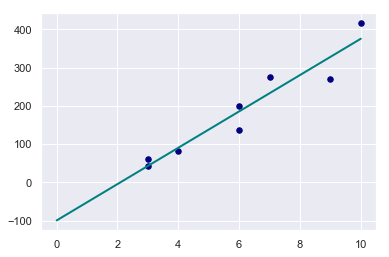

(8, 1) (10, 1)


In [38]:
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
X = xt[:, np.newaxis] # another way to convert row to col vector
y = yt[:, np.newaxis]

plt.scatter(xt, yt, color='navy', s=30, marker='o')
regr = linear_model.LinearRegression()
regr.fit(X, y)
# to plot regression line create sample x data and estimate y using prediction
x_plot = np.linspace(0, 10, 10)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal',linewidth=2)
plt.show()
print(np.shape(y), np.shape(X_plot))

### Using higher degree polynomial

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
X = xt[:, np.newaxis] 
y = yt[:, np.newaxis]
degree = 2
poly = PolynomialFeatures(degree)
XP = poly.fit_transform(X)
print (X)
print (XP)


[[ 7]
 [ 3]
 [ 4]
 [ 6]
 [10]
 [ 9]
 [ 3]
 [ 6]]
[[  1.   7.  49.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   6.  36.]
 [  1.  10. 100.]
 [  1.   9.  81.]
 [  1.   3.   9.]
 [  1.   6.  36.]]


In [41]:
# to plot regression line create sample x data
x_plot = np.linspace(0, 10, 50)
X_plot = x_plot[:, np.newaxis]
print (X_plot[:5])
XP_plot = poly.fit_transform(X_plot)
print (XP_plot[:5])

[[0.        ]
 [0.20408163]
 [0.40816327]
 [0.6122449 ]
 [0.81632653]]
[[1.         0.         0.        ]
 [1.         0.20408163 0.04164931]
 [1.         0.40816327 0.16659725]
 [1.         0.6122449  0.37484382]
 [1.         0.81632653 0.666389  ]]


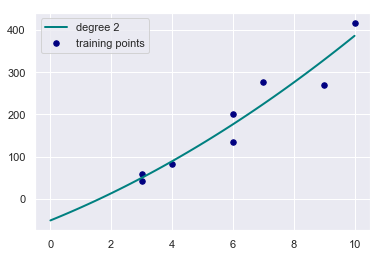

In [42]:
plt.scatter(xt, yt, color='navy', s=30, marker='o', label="training points")
regr = linear_model.LinearRegression()
regr.fit(XP, y)
y_plot = regr.predict(XP_plot) # estimate y for test data for plotting
plt.plot(x_plot, y_plot, color='teal', linewidth=2,label="degree %d" % degree)
plt.legend(loc='best')
plt.show()

### Create all plots in a loop with different degree of polynomials

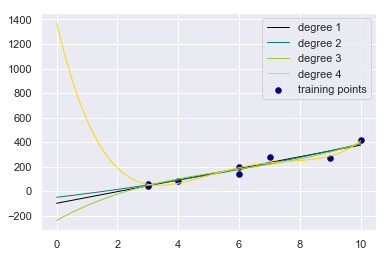

In [43]:
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
X = xt[:, np.newaxis] 
y = yt[:, np.newaxis]
x_plot = np.linspace(0, 10, 50)
X_plot = x_plot[:, np.newaxis]
plt.scatter(xt, yt, color='navy', s=30, marker='o', label="training points")

colors = ['black', 'teal', 'yellowgreen', 'gold']
for count, degree in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(degree)
    XP = poly.fit_transform(X)
    XP_plot = poly.fit_transform(X_plot)
    regr = linear_model.LinearRegression()
    regr.fit(XP, y)
    y_plot = regr.predict(XP_plot) # estimate y for test data for plotting
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=1,label="degree %d" % degree)

plt.legend(loc='best')
plt.show()

### Linear model with L2 regularization (L2)

In [45]:
from sklearn.linear_model import Ridge

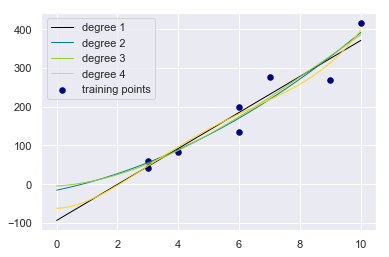

In [46]:
xt = np.array([7,3,4,6,10,9,3,6])
yt = np.array([276, 43, 82, 136, 417, 269, 60, 200])
X = xt[:, np.newaxis] 
y = yt[:, np.newaxis]
x_plot = np.linspace(0, 10, 50)
X_plot = x_plot[:, np.newaxis]
plt.scatter(xt, yt, color='navy', s=30, marker='o', label="training points")

colors = ['black', 'teal', 'yellowgreen', 'gold']
for count, degree in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(degree)
    XP = poly.fit_transform(X)
    XP_plot = poly.fit_transform(X_plot)
    regr = Ridge(alpha=1.0)
    regr.fit(XP, y)
    y_plot = regr.predict(XP_plot) # estimate y for test data for plotting
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=1,label="degree %d" % degree)

plt.legend(loc='best')
plt.show()

Exercise: For the following dataset from scikit repeat the "Create all plots in a loop with different degree of polynomials" and "Linear model with L2 regularization (L2)". For the second set of plot, use different values of alpha and degree to find the best fit (visually).

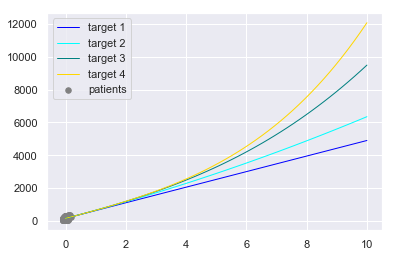

In [47]:
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
xt = diabetes.data[:,2]
yt = diabetes.target
X = xt[:, np.newaxis] 
y = yt[:, np.newaxis]
x_plot = np.linspace(0, 10, 50)
X_plot = x_plot[:, np.newaxis]
plt.scatter(xt, yt, color='grey', s=30, marker='o', label="patients")

colors = ['blue', 'aqua', 'teal', 'gold']
for count, target in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(target)
    XP = poly.fit_transform(X)
    XP_plot = poly.fit_transform(X_plot)
    regr = Ridge(alpha=1.0)
    regr.fit(XP, y)
    y_plot = regr.predict(XP_plot) # estimate y for test data for plotting
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=1,label="target %d" % target)

plt.legend(loc='best')
plt.show()

In [ ]:
y

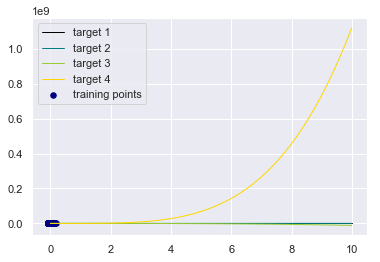

In [48]:
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
xt = diabetes.data[:,2]
yt = diabetes.target
X = xt[:, np.newaxis] 
y = yt[:, np.newaxis]
x_plot = np.linspace(0, 10, 50)
X_plot = x_plot[:, np.newaxis]
plt.scatter(xt, yt, color='navy', s=30, marker='o', label="training points")

colors = ['black', 'teal', 'yellowgreen', 'gold']
for count, target in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(target)
    XP = poly.fit_transform(X)
    XP_plot = poly.fit_transform(X_plot)
    regr = linear_model.LinearRegression()
    regr.fit(XP, y)
    y_plot = regr.predict(XP_plot) # estimate y for test data for plotting
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=1,label="target %d" % target)

plt.legend(loc='best')
plt.show()